len(x) = 100


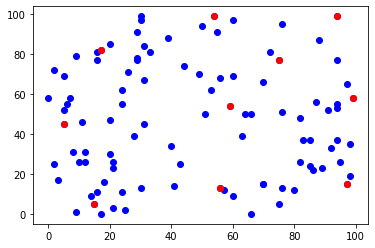

len(x) = 100
ind = 95
ind = 69
ind = 63
ind = 58
ind = 48
ind = 45
ind = 40
ind = 35
ind = 24
ind = 0
len(x) = 90
len(x) = 90


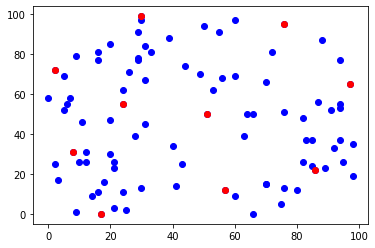

len(x) = 90
ind = 87
ind = 78
ind = 71
ind = 50
ind = 32
ind = 30
ind = 26
ind = 10
ind = 3
ind = 0
len(x) = 80
len(x) = 80


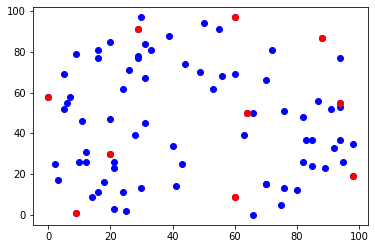

len(x) = 80
ind = 76
ind = 75
ind = 72
ind = 64
ind = 59
ind = 42
ind = 38
ind = 31
ind = 11
ind = 0
len(x) = 70
len(x) = 70


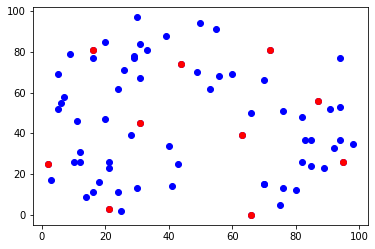

len(x) = 70
ind = 66
ind = 64
ind = 56
ind = 54
ind = 52
ind = 50
ind = 30
ind = 22
ind = 20
ind = 0
len(x) = 60
len(x) = 60


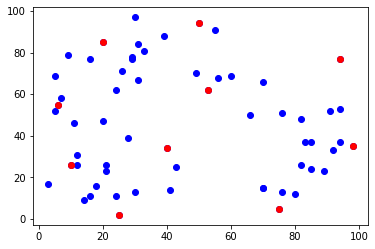

len(x) = 60
ind = 55
ind = 54
ind = 53
ind = 40
ind = 31
ind = 30
ind = 20
ind = 13
ind = 11
ind = 0
len(x) = 50
len(x) = 50


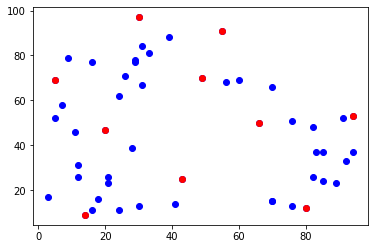

len(x) = 50
ind = 49
ind = 48
ind = 46
ind = 41
ind = 37
ind = 35
ind = 17
ind = 14
ind = 8
ind = 0
len(x) = 40
len(x) = 40


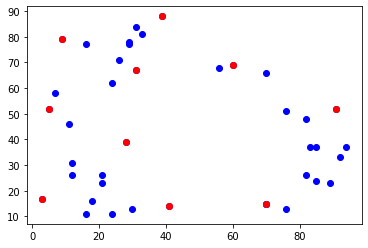

len(x) = 40
ind = 33
ind = 31
ind = 29
ind = 28
ind = 27
ind = 21
ind = 14
ind = 9
ind = 6
ind = 0
len(x) = 30
len(x) = 30


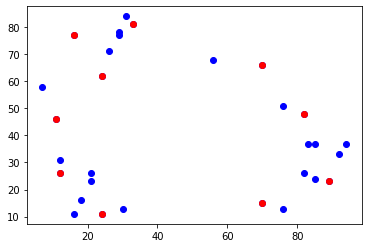

len(x) = 30
ind = 25
ind = 24
ind = 23
ind = 18
ind = 12
ind = 11
ind = 3
ind = 2
ind = 1
ind = 0
len(x) = 20
len(x) = 20


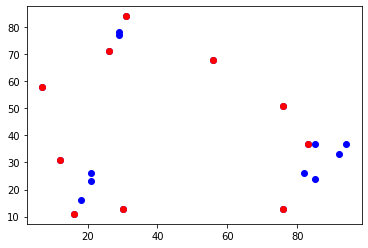

len(x) = 20
ind = 17
ind = 14
ind = 13
ind = 12
ind = 11
ind = 10
ind = 9
ind = 7
ind = 2
ind = 0
len(x) = 10
len(x) = 10


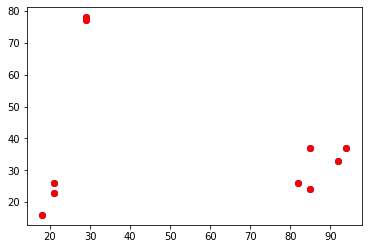

len(x) = 10
ind = 9
ind = 8
ind = 7
ind = 6
ind = 5
ind = 4
ind = 3
ind = 2
ind = 1
ind = 0
len(x) = 0


In [31]:
#k center problem with outliers
import numpy as np
import matplotlib.pyplot as plt
import math 

class KCenterProblemWithOutliers():
  def __init__(self, x_input, y_input) -> None:
    self.x_input, self.y_input = x_input, y_input
    self.NUM_INPUTS = len(x_input)
    self.dists = [[0 for _ in range(self.NUM_INPUTS)] for _ in range(self.NUM_INPUTS)]
    self.selected_samples = []

  def compute_dists(self):
    for r in range(self.NUM_INPUTS):
      for c in range(self.NUM_INPUTS):
        if not r == c:
          self.dists[r][c] = math.sqrt((self.x_input[r] - self.x_input[c])**2 + (self.y_input[r] - self.y_input[c])**2)

  def select_samples(self, query_size):
    def maxindex(dist):
      max_ind = 0
      for i in range(self.NUM_INPUTS):
          if (dist[i] > dist[max_ind]):
              max_ind = i
      return max_ind

    self.compute_dists()

    self.center_dists = [float('inf') for _ in range(self.NUM_INPUTS)]

    max_center = 0

    for _ in range(query_size):
      self.selected_samples.append(max_center)
      
      for j in range(self.NUM_INPUTS):
        self.center_dists[j] = min(self.center_dists[j], self.dists[max_center][j])
      
      max_center = maxindex(self.center_dists)

    x_query, y_query = [], []
    for sample_ind in self.selected_samples:
      x_query.append(self.x_input[sample_ind])
      y_query.append(self.y_input[sample_ind])

    self.plot_points(x_input, y_input, x_query, y_query)

    return self.selected_samples

  def plot_points(self, x_input, y_input, x_query, y_query):
    plt.scatter(x=x_input, y=y_input, color='blue')
    plt.scatter(x=x_query, y=y_query, color='red')
    plt.show()

if __name__ == '__main__' :
  min_val, max_val, num_vals = 0, 100, 100
  query_size = 10

  x_input = np.random.randint(min_val, max_val, num_vals).tolist()
  y_input = np.random.randint(min_val, max_val, num_vals).tolist()

  for _ in range(10):
    if num_vals // query_size > 0:
      print(f'len(x) = {len(x_input)}')

      query = KCenterProblemWithOutliers(x_input, y_input)
      prev_query_inds = query.select_samples(query_size)

      prev_query_inds.sort(reverse=True)

      print(f'len(x) = {len(x_input)}')

      for ind in prev_query_inds:
        print(f'ind = {ind}')
        x_input.pop(ind)
        y_input.pop(ind)

      print(f'len(x) = {len(x_input)}')